In [2]:
#Импорт библиотек
import numpy as np
import scipy.stats as ss
from scipy.stats import gamma
from scipy.stats import uniform
import statistics as st
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
import random
from scipy.optimize import minimize

In [ ]:
with open("Number_13.txt", "r") as f:
    data = [float(i) for s in f for i in s.split()]
    data = np.array(sorted(data))
    
len(data)

60

In [ ]:
print(max(data)-min(data))
print('Макисмальное значение', max(data))
print('Минимальное значение', min(data))

0.99136225778
Макисмальное значение 0.99170372
Минимальное значение 0.00034146222


# №1. Найти выборочные характеристики исследуемой с.в.

In [ ]:
print('Выборочное среднее',np.mean(data))
print ('Несмещенная выборочная дисперсия', np.var(data, ddof = 0))
print ('Смещенная дисперсия', np.var(data, ddof = 1))
print('Коэффициент ассиметрии',ss.skew(data))
print('Коэффициент эксцесса',ss.kurtosis(data)) 
print('Среднеквадратическое отклонение', st.sqrt(np.var(data, ddof = 0)))

Выборочное среднее 0.49342269055366667
Несмещенная выборочная дисперсия 0.08001044966562554
Смещенная дисперсия 0.08136655898199208
Коэффициент ассиметрии 0.07642724198797152
Коэффициент эксцесса -1.1809048272440879
Среднеквадратическое отклонение 0.2828611844449951


# №2. Построить э.ф.р. и нормированную гистограмму.

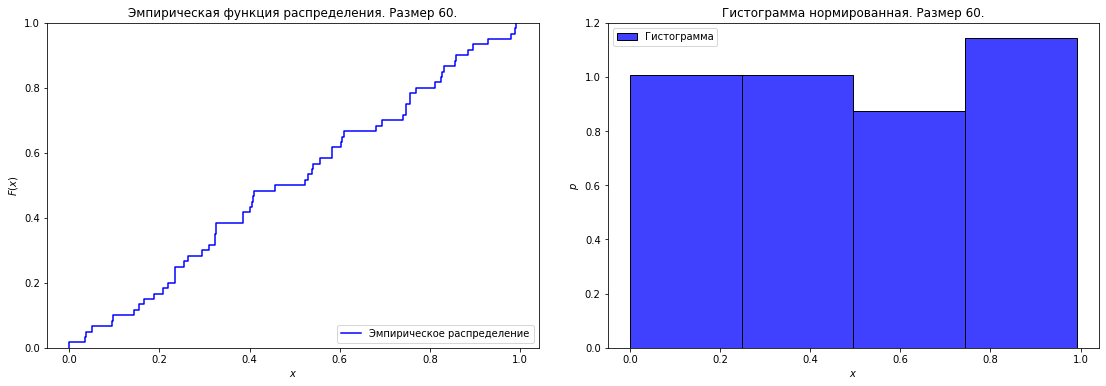

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 6))

sns.ecdfplot(data, label='Эмпирическое распределение', color="blue", ax=axes[0])
axes[0].yaxis.label.set_text('$F(x)$')
axes[0].xaxis.label.set_text('$x$')
axes[0].legend(loc='lower right')
axes[0].title.set_text(f"Эмпирическая функция распределения. Размер {len(data)}.")


sns.histplot(data, stat="density", label='Гистограмма', color="blue", ax=axes[1], bins=4)
axes[1].yaxis.label.set_text('$p$')
axes[1].xaxis.label.set_text('$x$')
axes[1].legend(loc='upper left')
axes[1].title.set_text(f"Гистограмма нормированная. Размер {len(data)}.")

fig.tight_layout(pad=3.0)
plt.show()

In [ ]:
interval = (max(data)-min(data))/4
one = []
two = []
three = []
four = []

for x in data:
    if x < interval + min(data):
        one.append(x)
    if interval + min(data) <= x < min(data) + interval*2:
        two.append(x)
    if min(data) + interval*2 <= x < min(data) + interval*3:
        three.append(x)
    if min(data) + interval*3 <= x:
        four.append(x)

print(interval)
df = pd.DataFrame(([min(one),max(one)],[min(two),max(two)],[min(three),max(three)],[min(four),max(four)]), columns=['Min', 'Max'])
df

0.247840564445


,Min,Max
0,0.000341,0.234783
1,0.254481,0.456425
2,0.523030,0.740365
3,0.746148,0.991704


In [ ]:
group = []
groups = []

location = min(data)

for i in range(4):
    group.append(location)
    location += interval
    group.append(location)
    groups.append(group)
    group = []
groups

[[0.00034146222, 0.248182026665],
 [0.248182026665, 0.49602259111],
 [0.49602259111, 0.743863155555],
 [0.743863155555, 0.9917037200000001]]

In [ ]:
len_of_groups = []
len_of_groups.append(len(one))
len_of_groups.append(len(two))
len_of_groups.append(len(three))
len_of_groups.append(len(four))
len_of_groups

[15, 15, 13, 17]

# №4. После анализа выборочных характеристик и вида гистограммы выдвинуть гипотезу о виде распределения исследуемой с.в.

Предполагаем, что это равномерное распределение

# №5. Проверить гипотезу о виде распределения на основе критерия хи-квадрат Фишера.

In [ ]:
def f(x):
    loc, scale = x[0], x[1]
    def p_group(left_bound, right_bound):
        # Возвращаяет вероятность попасть в отрезок от left_bound до right_bound
        return ss.uniform.cdf(right_bound, loc=loc, scale=scale) - ss.uniform.cdf(left_bound, loc=loc, scale=scale)
    hi = 0
    for index, group in enumerate(groups):
        if index == 0:
            left_bound = float('-inf') # - бесконечность
        else:
            left_bound = group[0]
        if index == len(groups) - 1:
            right_bound = float('inf') # + бесконечность
        else:
            right_bound = group[1]
        p_i = p_group(left_bound, right_bound)
        hi += (len_of_groups[index] - len(data) * p_i)**2 / (len(data) * p_i)
    
    return hi

In [ ]:
x = [0, 1]
result = minimize(f, [x[0], x[1]])

print(f'Значение Хи-квадрат = {result.fun}')
print(f'Значения формы и масштаба соответственно: {result.x}')

Значение Хи-квадрат = 0.14276020825224536
Значения формы и масштаба соответственно: [-0.01668663  1.06073424]


<ipython-input-10-2e1d3475dd51>:17: RuntimeWarning: divide by zero encountered in double_scalars
  hi += (len_of_groups[index] - len(data) * p_i)**2 / (len(data) * p_i)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-10-2e1d3475dd51>:17: RuntimeWarning: divide by zero encountered in double_scalars
  hi += (len_of_groups[index] - len(data) * p_i)**2 / (len(data) * p_i)


In [ ]:
loc1 = result.x[0]
scale1 = result.x[1]
print(loc1,scale1)

-0.01668663134880999 1.060734237801802


In [ ]:
X_stat = f([loc1, scale1])
X_stat

0.14276020825224536

In [ ]:
X_crit = ss.chi2.ppf(1-.05, df=4)
X_crit

9.487729036781154

In [ ]:
X_stat < X_crit

True

# №6. После того, как принято решение о виде распределения, найти МП- оценки параметров распределения с. в.

In [ ]:
loc2,scale2 = uniform.fit(data)
print(loc2,scale2)

0.00034146222 0.99136225778


# №7. Построить гипотетические теоретические кривые : ф.р.и плотность вероятности.

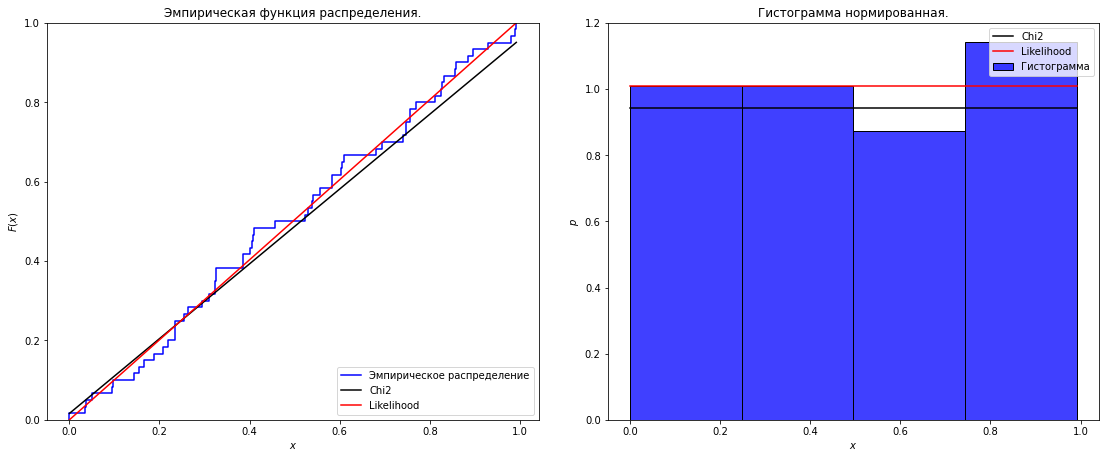

In [ ]:
loc1 = -0.01668663134461831
scale1 = 1.0607342377961857
loc2 = 0.00034146222
scale2 = 0.99136225778
fig, axes = plt.subplots(ncols=2, figsize=(16, 7))

sns.ecdfplot(data, label='Эмпирическое распределение', color="blue", ax=axes[0])
x_linspace = np.linspace(min(data), max(data), 1000)
sns.lineplot(x=x_linspace, y=ss.uniform.cdf(x_linspace, loc=loc1, scale=scale1), label='Chi2', color='black', ax=axes[0])
sns.lineplot(x=x_linspace, y=ss.uniform.cdf(x_linspace, loc=loc2, scale=scale2), label='Likelihood', color='red', ax=axes[0])
axes[0].yaxis.label.set_text('$F(x)$')
axes[0].xaxis.label.set_text('$x$')
axes[0].legend(loc='lower right')
axes[0].title.set_text(f"Эмпирическая функция распределения.")

sns.histplot(data, stat="density", label='Гистограмма', color="blue", ax=axes[1], bins=4)
sns.lineplot(x=x_linspace, y=ss.uniform.pdf(x_linspace, loc=loc1, scale=scale1), label='Chi2', color='black', ax=axes[1])
sns.lineplot(x=x_linspace, y=ss.uniform.pdf(x_linspace, loc=loc2, scale=scale2), label='Likelihood', color='red', ax=axes[1])
axes[1].yaxis.label.set_text('$p$')
axes[1].xaxis.label.set_text('$x$')
axes[1].legend(loc='upper right')
axes[1].title.set_text(f"Гистограмма нормированная.")

fig.tight_layout(pad=3.0)
plt.show()